## Свойства оценок

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.stats as sps
import seaborn as sns
sns.set(font_scale=1.5)

###   1. Несмещенность оценок

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$. 
Как известно из теории, оценки $\frac{n+1}{n}X_{(n)}, 2\overline{X}$ являются *несмещенными*. В то время как, оценка  $X_{(n)}$ таким ствойством не обладает. Давайте визуализируем данные свойства оценок.

Реализуем выборку из равномерного распределения размером `sample_size`=100.

In [12]:
sample_size = 100
X = sps.uniform.rvs(size=sample_size)

В этом случае мы сгенерировали выборку из распределения $U[0, 1]$.


Реализуйте три функции, каждая из которых на вход берет несколько выборок, а на выход выдает массив оценок  
(первая функция - $X_{(n)}$, вторая функция - $\frac{n+1}{n}X_{(n)}$, третья функция - $2\overline{X}$)  для каждой выборки.

In [13]:
def estimate_X_n(X):
    
    """
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    """
    X.sort()
    return X[:, -1]

def estimate_X_n_corrected(X):
    """
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    """
    X.sort()
    return X[:, -1]*((X.shape[1] + 1)/X.shape[1])

def estimate_2_mean(X):
    """
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    """
    return [2 * sum(i)/len(i) for i in X]

Проверим, что ваши функции реализованы корректно (ячейка не должна выдавать ошибок).

In [14]:
X = np.array([[1, 3, 3902, 6], [2, 5, 69751, 89]])


assert(sum(estimate_X_n(X) != np.array(( 3902, 69751))) == 0)
assert(sum(estimate_X_n_corrected(X) != np.array((4877.5 ,87188.75))) == 0)
assert(sum(estimate_2_mean(X) != np.array([ 1956. , 34923.5])) == 0)


Зададим список оценок и разные параметры для отрисовки графика

In [15]:
estimators = [
    (estimate_X_n, r'$X_{(n)}$', 'blue', 0.0),
    (estimate_X_n_corrected, r'$\frac{n+1}{n}X_{(n)}$', 'purple', 0.1),
    (estimate_2_mean, r'$2\overline{X}$', 'green', 0.2)
]

Мы хотим понять, являются ли оценки параметра $\theta$ смещенными, для этого нам нужно провести множество экспериментов (сгенерировать выборку много раз, так как при каждой генерации получаются разные числа).

 Создадим 500 выборок размера `sample_size`.

In [16]:
sample_count = 500
sample_size = 100
X = np.array([sps.uniform.rvs(size=sample_size) for i in range (sample_count)])
X.shape

(500, 100)

Визуализируем полученные оценки на одном графике. Звездочками обозначим средние значения по 500 экспериментам для каждой оценки.

AttributeError: 'list' object has no attribute 'mean'

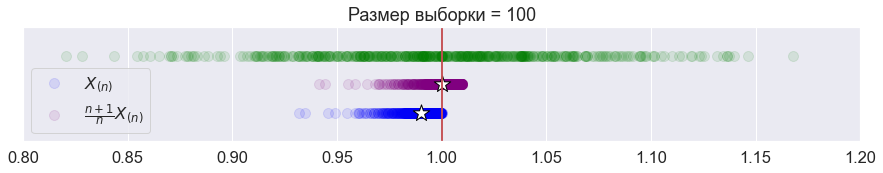

In [17]:
plt.figure(figsize=(15, 0.7*len(estimators)))
for estimator, name, color, y in estimators:
    E = estimator(X)
    plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                    s=100, color=color, label=name)
    plt.scatter(E.mean(), y, marker='*', s=300,
                    color='w', edgecolors='black')

    plt.vlines(1, -1, 1, color='r')
    plt.title('Размер выборки = %d' % sample_size)
    plt.yticks([])
    plt.legend()
    plt.xlim((0.8, 1.2))
    plt.ylim((-0.1, 0.1 * len(estimators)))

Напишите функцию построения таких графиков в общем виде: на вход функция может получать любые распределения (`distributions`) и любые оценки (`estimators`).

In [18]:
def est_plot(distribution, estimators, sample_size, sample_count):
    '''
    Построение графика разброса реализаций оценок и их средних значений.

    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    sample_size -- размер выборок
    sample_count -- количество генерируемых выборок
    '''
    plt.figure(figsize=(15, 0.7*len(estimators)))
    for estimator, name, color, y in estimators:
        E = np.array(estimator(distribution))
        plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                        s=100, color=color, label=name)
        plt.scatter(E.mean(), y, marker='*', s=300,
                        color='w', edgecolors='black')

        plt.vlines(1, -1, 1, color='r')
        plt.title('Размер выборки = %d' % sample_size)
        plt.yticks([])
        plt.legend()
        plt.xlim((0.8, 1.2))
        plt.ylim((-0.1, 0.1 * len(estimators)))

Постройте три графика, аналогичных верхнему, для разных размеров выборок (10, 100, 500).


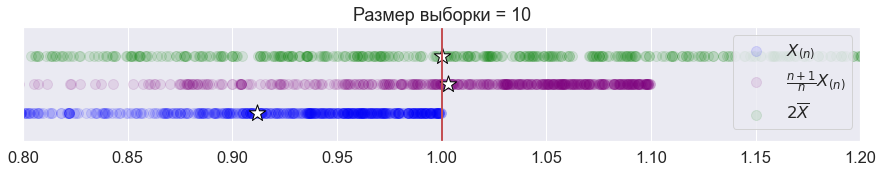

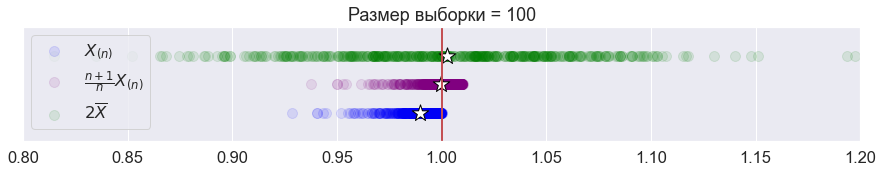

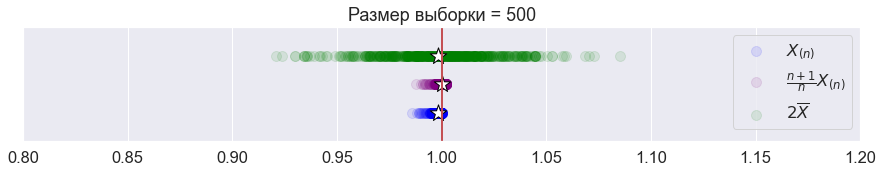

In [19]:
sample_count = 500  # количество экспериментов
sample_size_list = [10, 100, 500] # размеры выборок

for sample_size in sample_size_list:
    f = np.array([sps.uniform.rvs(size=sample_size) for i in range (sample_count)])
    est_plot(f, estimators, sample_size, sample_count)

**2.** Изучим поведение среднего оценок из первого пункта при росте размера $n$ выборки. Для вычисления зависимости нужно один раз сгенерировать выборки из п. 1.1 достаточно большого размера и посчитать оценки по префиксам, используя функции из `numpy`. Какие из оценок являются асимптотически несмещёнными (т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$)?

In [1]:
def mean_plot(distribution, estimators, n_grid, sample_count):
    '''
    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    n_grid -- массив значений размера выборки
    sample_count -- количество генерируемых выборок
    '''
    plt.figure(figsize=(15, 10))
    y_1 = []
    y_2 = []
    y_3 = []
    int_n_grid = []
    for i in n_grid:
        int_n_grid.append(int(i))

    for i in int_n_grid:
        X = np.array(sps.uniform.rvs(size=(sample_count, i)))
        #X = np.array([sps.uniform.rvs(size=i) for j in range(sample_count)])
        y_1.append(np.mean(estimate_X_n(X)))
        y_2.append(np.mean(estimate_X_n_corrected(X)))
        y_3.append(np.mean(estimate_2_mean(X)))
    plt.plot(int_n_grid, y_1, label=estimate_X_n)
    plt.plot(int_n_grid, y_2, label=estimate_X_n_corrected)
    plt.plot(int_n_grid, y_3, label=estimate_2_mean)
    plt.legend()
    plt.show
    

In [2]:
n_grid = np.linspace(10, 300, 100)
mean_plot(sps.uniform, estimators, n_grid, sample_count)

NameError: name 'np' is not defined

**Вывод.** Несмещенность &mdash; свойство оценки в среднем быть равной параметру, который она оценивает. Иначе говоря, при бесконечном повторении эксперимента в среднем оценка будет равна истинному значению параметра.
Проведенные эксперименты подтверждают свойство несмещенности &mdash; среднее значение несмещенных оценок $\frac{n}{n-1}X_{(n)}$ и $2\overline{X}$ оказались примерно равны истинному значению параметра в отличии от смещенной оценки $X_{(n)}$. Кроме того, можно заметить, что для смещенной оценки $X_{(n)}$ смещение уменьшается с ростом размера выборки, иначе говоря, она является *асимптотически несмещенной*.

В лабораторных работах скорректированные оценки используют, т.к. число опытов часто мало и $n$ нельзя считать достаточно большим. В таком случае отличие между несмещенными оценками и асимптотически несмещенными оценками становится существенным.